# **Statistical Testing Demonstration Covers: Z-test, T-test, Type I and Type II**

STATISTICAL TESTING WITH TITANIC DATASET

📊 Dataset Overview:
   Survived        Age        Fare  PassengerId
0         0  32.285128   15.906881            1
1         1  30.911648  106.866869            2
2         1  49.447083   43.479669            3
3         0  14.900749   25.437579            4
4         0  19.798734   37.162090            5

Dataset Shape: (891, 4)

Survival Rate: 37.37%

1. Z-TEST (Large Sample Test)

📌 Z-Test Definition:
A Z-test is used when:
  • Sample size is large (n ≥ 30)
  • Population standard deviation is known
  • Data is normally distributed (or n is large enough for CLT)
  • Test statistic: Z = (x̄ - μ) / (σ/√n)

🎯 Hypothesis Test: Is the average age different from 30?
H₀: μ = 30 (null hypothesis)
H₁: μ ≠ 30 (alternative hypothesis)

Sample size: 713
Sample mean: 28.49
Population std: 13.69
Z-statistic: -2.9395
P-value: 0.0033
Critical values (α=0.05): ±1.9600
✅ Reject H₀: Average age is significantly different from 30

2. T-TEST (Small Sample Test)

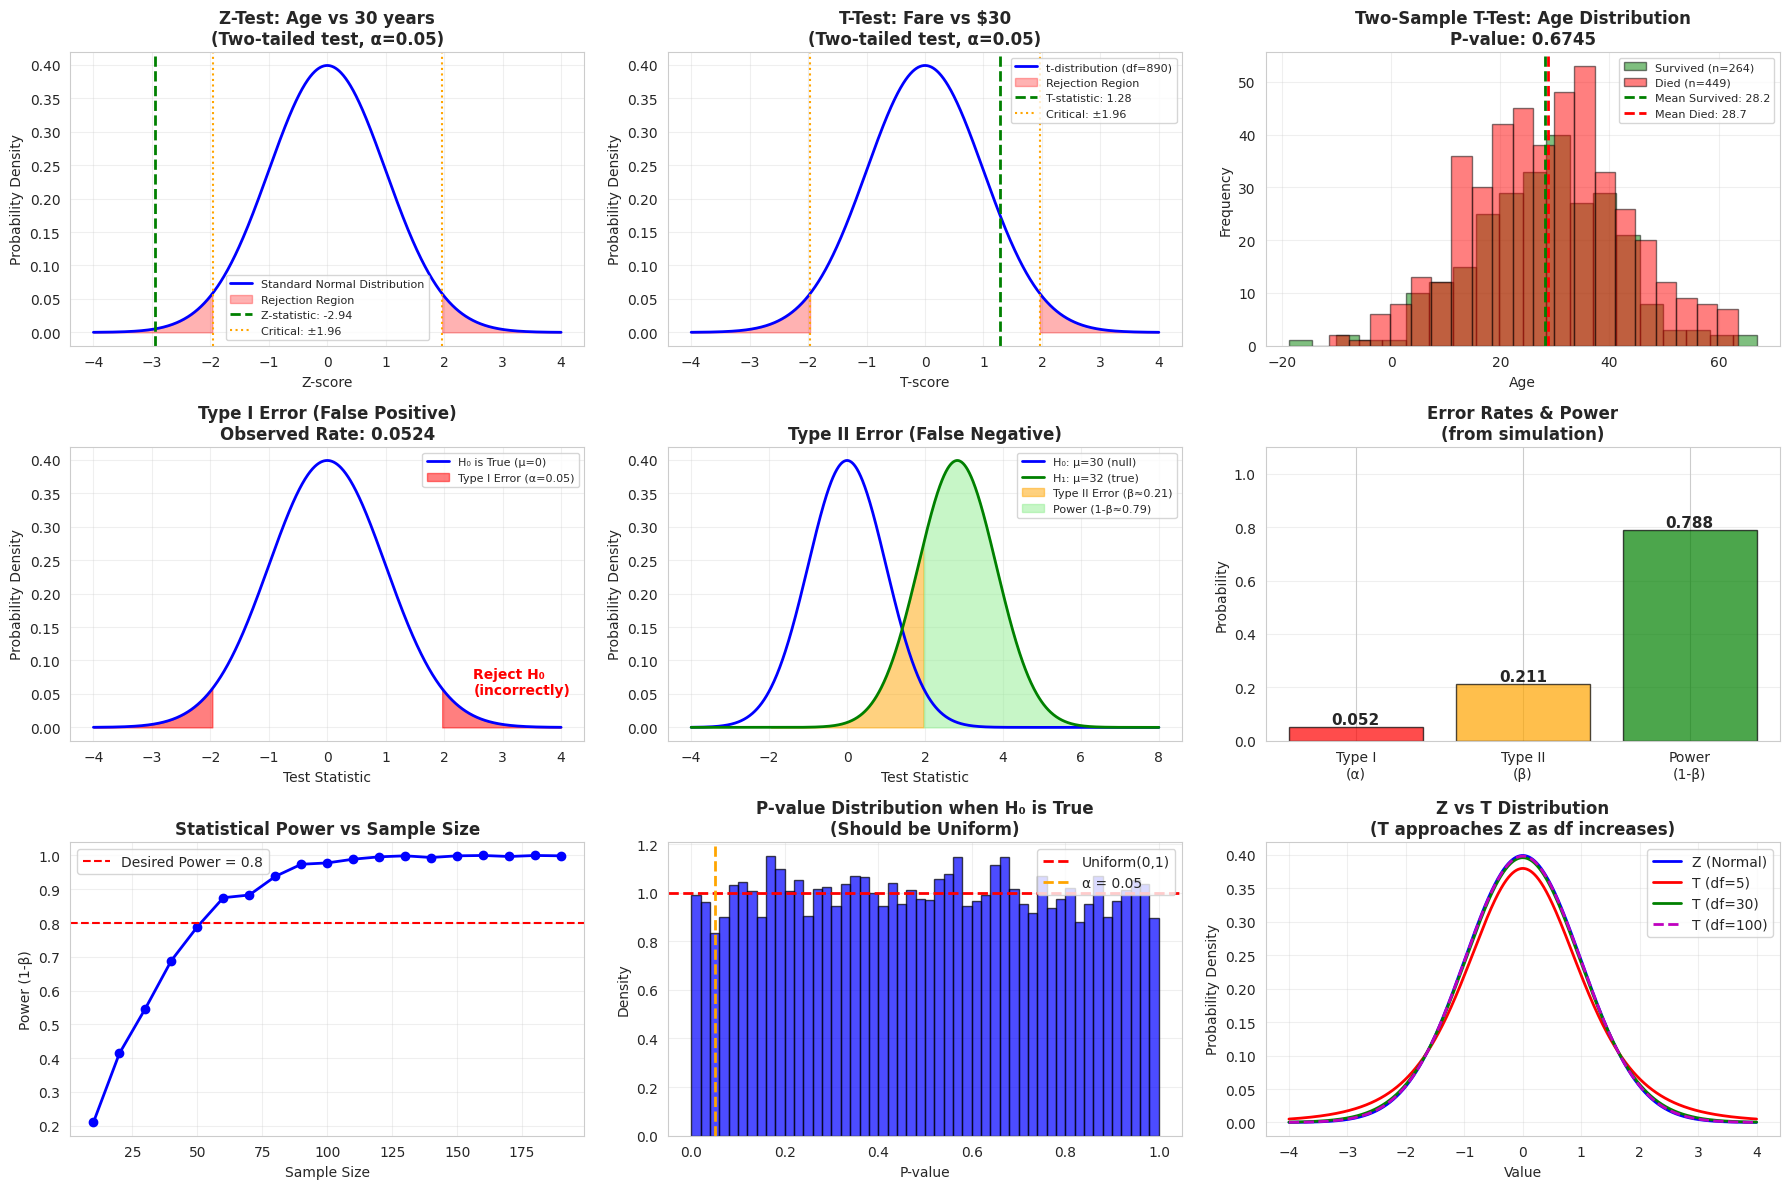

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t as t_dist
import warnings
import os
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create synthetic Titanic-like dataset
print("="*80)
print("STATISTICAL TESTING WITH TITANIC DATASET")
print("="*80)

np.random.seed(42)
n_passengers = 891

# Generate realistic Titanic-like data
survived = np.random.binomial(1, 0.38, n_passengers)

# Generate ages with some missing values
ages = np.random.normal(29, 14, n_passengers)
missing_indices = np.random.choice(n_passengers, size=int(n_passengers * 0.2), replace=False)
ages[missing_indices] = np.nan

# Adjust ages based on survival (survivors tend to be younger)
for i in range(len(ages)):
    if not np.isnan(ages[i]) and survived[i] == 1:
        ages[i] = ages[i] * 0.95  # Slight adjustment for survivors

fares = np.abs(np.random.gamma(2, 15, n_passengers))

df = pd.DataFrame({
    'Survived': survived,
    'Age': ages,
    'Fare': fares,
    'PassengerId': range(1, n_passengers + 1)
})

print("\n📊 Dataset Overview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"\nSurvival Rate: {df['Survived'].mean():.2%}")

# ============================================================================
# PART 1: Z-TEST
# ============================================================================
print("\n" + "="*80)
print("1. Z-TEST (Large Sample Test)")
print("="*80)

print("\n📌 Z-Test Definition:")
print("A Z-test is used when:")
print("  • Sample size is large (n ≥ 30)")
print("  • Population standard deviation is known")
print("  • Data is normally distributed (or n is large enough for CLT)")
print("  • Test statistic: Z = (x̄ - μ) / (σ/√n)")

# Example: Testing if average age differs from 30
ages = df['Age'].dropna()
sample_mean = ages.mean()
population_std = ages.std()  # Assuming we know population std
n = len(ages)
hypothesized_mean = 30

# Calculate Z-statistic
z_statistic = (sample_mean - hypothesized_mean) / (population_std / np.sqrt(n))
p_value_z = 2 * (1 - norm.cdf(abs(z_statistic)))

print(f"\n🎯 Hypothesis Test: Is the average age different from 30?")
print(f"H₀: μ = 30 (null hypothesis)")
print(f"H₁: μ ≠ 30 (alternative hypothesis)")
print(f"\nSample size: {n}")
print(f"Sample mean: {sample_mean:.2f}")
print(f"Population std: {population_std:.2f}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value_z:.4f}")
print(f"Critical values (α=0.05): ±{norm.ppf(0.975):.4f}")

if p_value_z < 0.05:
    print(f"✅ Reject H₀: Average age is significantly different from 30")
else:
    print(f"❌ Fail to reject H₀: Not enough evidence that average age differs from 30")

# ============================================================================
# PART 2: T-TEST
# ============================================================================
print("\n" + "="*80)
print("2. T-TEST (Small Sample Test)")
print("="*80)

print("\n📌 T-Test Definition:")
print("A T-test is used when:")
print("  • Sample size is small (n < 30) OR population std is unknown")
print("  • Data is normally distributed")
print("  • Test statistic: T = (x̄ - μ) / (s/√n)")
print("  • Uses t-distribution with (n-1) degrees of freedom")

# Example 1: One-sample t-test
print("\n🎯 ONE-SAMPLE T-TEST:")
print("Testing if average fare is different from $30")

fares = df['Fare'].dropna()
hypothesized_fare = 30

t_statistic, p_value_t = stats.ttest_1samp(fares, hypothesized_fare)

print(f"\nH₀: μ = 30")
print(f"H₁: μ ≠ 30")
print(f"Sample size: {len(fares)}")
print(f"Sample mean: ${fares.mean():.2f}")
print(f"Sample std: ${fares.std():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value_t:.4f}")
print(f"Degrees of freedom: {len(fares)-1}")

if p_value_t < 0.05:
    print(f"✅ Reject H₀: Average fare is significantly different from $30")
else:
    print(f"❌ Fail to reject H₀: Not enough evidence")

# Example 2: Two-sample t-test (Independent samples)
print("\n🎯 TWO-SAMPLE T-TEST (Independent):")
print("Comparing ages between survivors and non-survivors")

ages_survived = df[df['Survived'] == 1]['Age'].dropna()
ages_died = df[df['Survived'] == 0]['Age'].dropna()

t_stat_2samp, p_val_2samp = stats.ttest_ind(ages_survived, ages_died)

print(f"\nH₀: μ_survived = μ_died")
print(f"H₁: μ_survived ≠ μ_died")
print(f"Survivors mean age: {ages_survived.mean():.2f}")
print(f"Non-survivors mean age: {ages_died.mean():.2f}")
print(f"T-statistic: {t_stat_2samp:.4f}")
print(f"P-value: {p_val_2samp:.4f}")

if p_val_2samp < 0.05:
    print(f"✅ Reject H₀: There IS a significant difference in ages")
else:
    print(f"❌ Fail to reject H₀: No significant difference in ages")

# ============================================================================
# PART 3: TYPE I and TYPE II ERRORS
# ============================================================================
print("\n" + "="*80)
print("3. TYPE I AND TYPE II ERRORS")
print("="*80)

print("\n📌 Error Types Definition:")
print("\nTYPE I ERROR (α - Alpha):")
print("  • False Positive")
print("  • Rejecting H₀ when H₀ is actually TRUE")
print("  • Example: Concluding there's a difference when there isn't")
print("  • Probability = Significance level (α, typically 0.05)")

print("\nTYPE II ERROR (β - Beta):")
print("  • False Negative")
print("  • Failing to reject H₀ when H₀ is actually FALSE")
print("  • Example: Missing a real difference")
print("  • Probability = β")
print("  • Power = 1 - β (probability of correctly rejecting false H₀)")

print("\n" + "-"*80)
print("CONFUSION MATRIX FOR HYPOTHESIS TESTING:")
print("-"*80)
print("                    |  H₀ is True  |  H₀ is False")
print("-"*80)
print("Reject H₀          |  Type I Error |  Correct (Power)")
print("                    |  (α)          |  (1-β)")
print("-"*80)
print("Fail to Reject H₀  |  Correct      |  Type II Error")
print("                    |  (1-α)        |  (β)")
print("-"*80)

# Simulation to demonstrate Type I and Type II errors
print("\n🎯 SIMULATION DEMONSTRATION:")

# Type I Error Simulation
np.random.seed(42)
n_simulations = 10000
alpha = 0.05
type1_errors = 0

print(f"\n1. Type I Error Simulation ({n_simulations} trials):")
print(f"   H₀ is TRUE: Population mean = 30")

for _ in range(n_simulations):
    # Generate sample from population where H0 is TRUE (mean=30)
    sample = np.random.normal(loc=30, scale=5, size=50)
    t_stat, p_val = stats.ttest_1samp(sample, 30)
    if p_val < alpha:
        type1_errors += 1

type1_error_rate = type1_errors / n_simulations
print(f"   Observed Type I Error Rate: {type1_error_rate:.4f}")
print(f"   Expected (α): {alpha}")
print(f"   Interpretation: We incorrectly rejected H₀ {type1_error_rate:.1%} of the time")

# Type II Error Simulation
type2_errors = 0
true_mean = 32  # H0 is FALSE

print(f"\n2. Type II Error Simulation ({n_simulations} trials):")
print(f"   H₀ is FALSE: True population mean = {true_mean}, but we test H₀: μ = 30")

for _ in range(n_simulations):
    # Generate sample from population where H0 is FALSE (mean=32, not 30)
    sample = np.random.normal(loc=true_mean, scale=5, size=50)
    t_stat, p_val = stats.ttest_1samp(sample, 30)
    if p_val >= alpha:  # Failed to reject when we should have
        type2_errors += 1

type2_error_rate = type2_errors / n_simulations
power = 1 - type2_error_rate

print(f"   Observed Type II Error Rate (β): {type2_error_rate:.4f}")
print(f"   Statistical Power (1-β): {power:.4f}")
print(f"   Interpretation: We missed detecting the true difference {type2_error_rate:.1%} of the time")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS...")
print("="*80)

fig = plt.figure(figsize=(18, 12))

# 1. Z-test visualization
ax1 = plt.subplot(3, 3, 1)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, 'b-', linewidth=2, label='Standard Normal Distribution')

# Critical regions
critical_value = norm.ppf(0.975)
x_left = x[x <= -critical_value]
x_right = x[x >= critical_value]
plt.fill_between(x_left, 0, norm.pdf(x_left, 0, 1), alpha=0.3, color='red', label='Rejection Region')
plt.fill_between(x_right, 0, norm.pdf(x_right, 0, 1), alpha=0.3, color='red')

# Mark the test statistic
plt.axvline(z_statistic, color='green', linestyle='--', linewidth=2, label=f'Z-statistic: {z_statistic:.2f}')
plt.axvline(-critical_value, color='orange', linestyle=':', linewidth=1.5, label=f'Critical: ±{critical_value:.2f}')
plt.axvline(critical_value, color='orange', linestyle=':', linewidth=1.5)

plt.title('Z-Test: Age vs 30 years\n(Two-tailed test, α=0.05)', fontsize=12, fontweight='bold')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 2. T-test visualization (one-sample)
ax2 = plt.subplot(3, 3, 2)
df_t = len(fares) - 1
x_t = np.linspace(-4, 4, 1000)
y_t = t_dist.pdf(x_t, df_t)
plt.plot(x_t, y_t, 'b-', linewidth=2, label=f't-distribution (df={df_t})')

# Critical regions for t-test
critical_t = t_dist.ppf(0.975, df_t)
x_left_t = x_t[x_t <= -critical_t]
x_right_t = x_t[x_t >= critical_t]
plt.fill_between(x_left_t, 0, t_dist.pdf(x_left_t, df_t), alpha=0.3, color='red', label='Rejection Region')
plt.fill_between(x_right_t, 0, t_dist.pdf(x_right_t, df_t), alpha=0.3, color='red')

plt.axvline(t_statistic, color='green', linestyle='--', linewidth=2, label=f'T-statistic: {t_statistic:.2f}')
plt.axvline(-critical_t, color='orange', linestyle=':', linewidth=1.5, label=f'Critical: ±{critical_t:.2f}')
plt.axvline(critical_t, color='orange', linestyle=':', linewidth=1.5)

plt.title('T-Test: Fare vs $30\n(Two-tailed test, α=0.05)', fontsize=12, fontweight='bold')
plt.xlabel('T-score')
plt.ylabel('Probability Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 3. Two-sample t-test (Age comparison)
ax3 = plt.subplot(3, 3, 3)
plt.hist(ages_survived, bins=20, alpha=0.5, label=f'Survived (n={len(ages_survived)})', color='green', edgecolor='black')
plt.hist(ages_died, bins=20, alpha=0.5, label=f'Died (n={len(ages_died)})', color='red', edgecolor='black')
plt.axvline(ages_survived.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean Survived: {ages_survived.mean():.1f}')
plt.axvline(ages_died.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean Died: {ages_died.mean():.1f}')
plt.title(f'Two-Sample T-Test: Age Distribution\nP-value: {p_val_2samp:.4f}', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 4. Type I Error Illustration
ax4 = plt.subplot(3, 3, 4)
x = np.linspace(-4, 4, 1000)
y_null = norm.pdf(x, 0, 1)
plt.plot(x, y_null, 'b-', linewidth=2, label='H₀ is True (μ=0)')

# Show α regions
critical_val = norm.ppf(0.975)
x_reject_left = x[x <= -critical_val]
x_reject_right = x[x >= critical_val]
plt.fill_between(x_reject_left, 0, norm.pdf(x_reject_left, 0, 1), alpha=0.5, color='red', label=f'Type I Error (α={alpha})')
plt.fill_between(x_reject_right, 0, norm.pdf(x_reject_right, 0, 1), alpha=0.5, color='red')

plt.title(f'Type I Error (False Positive)\nObserved Rate: {type1_error_rate:.4f}', fontsize=12, fontweight='bold')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.annotate('Reject H₀\n(incorrectly)', xy=(2.5, 0.05), fontsize=10, color='red', fontweight='bold')

# 5. Type II Error Illustration
ax5 = plt.subplot(3, 3, 5)
effect_size = (true_mean - 30) / 5  # standardized
x = np.linspace(-4, 8, 1000)
y_null = norm.pdf(x, 0, 1)
y_alt = norm.pdf(x, effect_size * np.sqrt(50), 1)

plt.plot(x, y_null, 'b-', linewidth=2, label='H₀: μ=30 (null)')
plt.plot(x, y_alt, 'g-', linewidth=2, label=f'H₁: μ={true_mean} (true)')

# Show β region
critical_val = norm.ppf(0.975)
x_accept = x[(x >= -critical_val) & (x <= critical_val)]
plt.fill_between(x_accept, 0, norm.pdf(x_accept, effect_size * np.sqrt(50), 1),
                 alpha=0.5, color='orange', label=f'Type II Error (β≈{type2_error_rate:.2f})')

# Show power region
x_power = x[x > critical_val]
plt.fill_between(x_power, 0, norm.pdf(x_power, effect_size * np.sqrt(50), 1),
                 alpha=0.5, color='lightgreen', label=f'Power (1-β≈{power:.2f})')

plt.title('Type II Error (False Negative)', fontsize=12, fontweight='bold')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 6. Error Rates Comparison
ax6 = plt.subplot(3, 3, 6)
errors = ['Type I\n(α)', 'Type II\n(β)', 'Power\n(1-β)']
rates = [type1_error_rate, type2_error_rate, power]
colors = ['red', 'orange', 'green']
bars = plt.bar(errors, rates, color=colors, alpha=0.7, edgecolor='black')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{rates[i]:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Error Rates & Power\n(from simulation)', fontsize=12, fontweight='bold')
plt.ylabel('Probability')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')

# 7. Sample Size vs Power
ax7 = plt.subplot(3, 3, 7)
sample_sizes = np.arange(10, 200, 10)
powers = []

for n in sample_sizes:
    type2 = 0
    for _ in range(1000):
        sample = np.random.normal(loc=true_mean, scale=5, size=n)
        t_stat, p_val = stats.ttest_1samp(sample, 30)
        if p_val >= 0.05:
            type2 += 1
    powers.append(1 - type2/1000)

plt.plot(sample_sizes, powers, 'b-', linewidth=2, marker='o')
plt.axhline(0.8, color='red', linestyle='--', label='Desired Power = 0.8')
plt.title('Statistical Power vs Sample Size', fontsize=12, fontweight='bold')
plt.xlabel('Sample Size')
plt.ylabel('Power (1-β)')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. P-value Distribution under H0
ax8 = plt.subplot(3, 3, 8)
p_values_h0 = []
for _ in range(10000):
    sample = np.random.normal(loc=30, scale=5, size=50)
    _, p_val = stats.ttest_1samp(sample, 30)
    p_values_h0.append(p_val)

plt.hist(p_values_h0, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axhline(1, color='red', linestyle='--', linewidth=2, label='Uniform(0,1)')
plt.axvline(0.05, color='orange', linestyle='--', linewidth=2, label='α = 0.05')
plt.title('P-value Distribution when H₀ is True\n(Should be Uniform)', fontsize=12, fontweight='bold')
plt.xlabel('P-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# 9. Z vs T distribution comparison
ax9 = plt.subplot(3, 3, 9)
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, 0, 1), 'b-', linewidth=2, label='Z (Normal)')
plt.plot(x, t_dist.pdf(x, 5), 'r-', linewidth=2, label='T (df=5)')
plt.plot(x, t_dist.pdf(x, 30), 'g-', linewidth=2, label='T (df=30)')
plt.plot(x, t_dist.pdf(x, 100), 'm--', linewidth=2, label='T (df=100)')
plt.title('Z vs T Distribution\n(T approaches Z as df increases)', fontsize=12, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Create the directory if it doesn't exist
os.makedirs('/mnt/user-data/outputs/', exist_ok=True)

plt.savefig('/mnt/user-data/outputs/statistical_tests_visualization.png', dpi=300, bbox_inches='tight')
print("\n✅ Main visualization saved!")

# Create summary statistics table
print("\n" + "="*80)
print("SUMMARY STATISTICS TABLE")
print("="*80)

summary_data = {
    'Test': ['Z-Test (Age)', 'T-Test (Fare)', 'Two-Sample T-Test (Age)'],
    'Test Statistic': [f'{z_statistic:.4f}', f'{t_statistic:.4f}', f'{t_stat_2samp:.4f}'],
    'P-value': [f'{p_value_z:.4f}', f'{p_value_t:.4f}', f'{p_val_2samp:.4f}'],
    'Decision (α=0.05)': [
        'Reject H₀' if p_value_z < 0.05 else 'Fail to Reject',
        'Reject H₀' if p_value_t < 0.05 else 'Fail to Reject',
        'Reject H₀' if p_val_2samp < 0.05 else 'Fail to Reject'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("KEY TAKEAWAYS")
print("="*80)
print("\n1. Z-TEST vs T-TEST:")
print("   • Z-test: Large samples (n≥30), known population σ")
print("   • T-test: Small samples or unknown population σ")
print("   • T-distribution has heavier tails than Z (normal)")
print("   • As df increases, t-distribution → normal distribution")

print("\n2. TYPE I ERROR (α):")
print(f"   • False Positive rate: {type1_error_rate:.4f} ≈ {alpha}")
print("   • We control this by setting significance level α")
print("   • Trade-off: Lower α → fewer false positives but more false negatives")

print("\n3. TYPE II ERROR (β):")
print(f"   • False Negative rate: {type2_error_rate:.4f}")
print(f"   • Statistical Power: {power:.4f}")
print("   • Increases with: larger sample size, larger effect size, higher α")

print("\n4. PRACTICAL IMPLICATIONS:")
print("   • Always consider both error types for your context")
print("   • Medical testing: Type II error (missing disease) might be worse")
print("   • Spam filtering: Type I error (blocking real email) might be worse")
print("   • Increase sample size to improve power without increasing α")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE! Check the saved visualization.")
print("="*80)

plt.show()

In [5]:
import numpy as np

def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    """
    Calculates the posterior probability P(A|B) using Bayes' Theorem.

    Args:
        p_a (float): Prior probability of event A, P(A).
        p_b_given_a (float): Likelihood of event B given A, P(B|A).
        p_b_given_not_a (float): Likelihood of event B given not A, P(B|~A).

    Returns:
        float: Posterior probability of event A given B, P(A|B).
    """
    # Calculate P(~A)
    p_not_a = 1 - p_a

    # Calculate P(B)
    p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)

    # Calculate P(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b

    return p_a_given_b

# Example usage:
# Imagine a rare disease (A) affects 1% of the population (P(A) = 0.01).
# A test for the disease is 90% accurate if you have the disease (P(B|A) = 0.90).
# The test is 95% accurate if you DON'T have the disease (P(~B|~A) = 0.95).
# We want to find the probability of having the disease given a positive test result (P(A|B)).

p_disease = 0.01
p_positive_given_disease = 0.90

# P(Positive test | No disease) = 1 - P(Negative test | No disease)
p_positive_given_no_disease = 1 - 0.95 # This is a Type I error (false positive)

posterior_probability = bayes_theorem(p_disease, p_positive_given_disease, p_positive_given_no_disease)

print(f"Prior probability of disease (P(A)): {p_disease:.2%}")
print(f"Likelihood of positive test given disease (P(B|A)): {p_positive_given_disease:.2%}")
print(f"Likelihood of positive test given no disease (P(B|~A)): {p_positive_given_no_disease:.2%}")
print(f"\nPosterior probability of having the disease given a positive test result (P(A|B)): {posterior_probability:.2%}")


Prior probability of disease (P(A)): 1.00%
Likelihood of positive test given disease (P(B|A)): 90.00%
Likelihood of positive test given no disease (P(B|~A)): 5.00%

Posterior probability of having the disease given a positive test result (P(A|B)): 15.38%


# **Bayes Theorem example**

Hypothetical Population: 100000
  With Disease: 1000 (1.0%)
  Without Disease: 99000 (99.0%)
  True Positives (Disease & Test+): 900
  False Positives (No Disease & Test+): 4950
  Total Positive Tests: 5850
  Calculated Posterior (P(Disease|Positive Test)): 15.38%


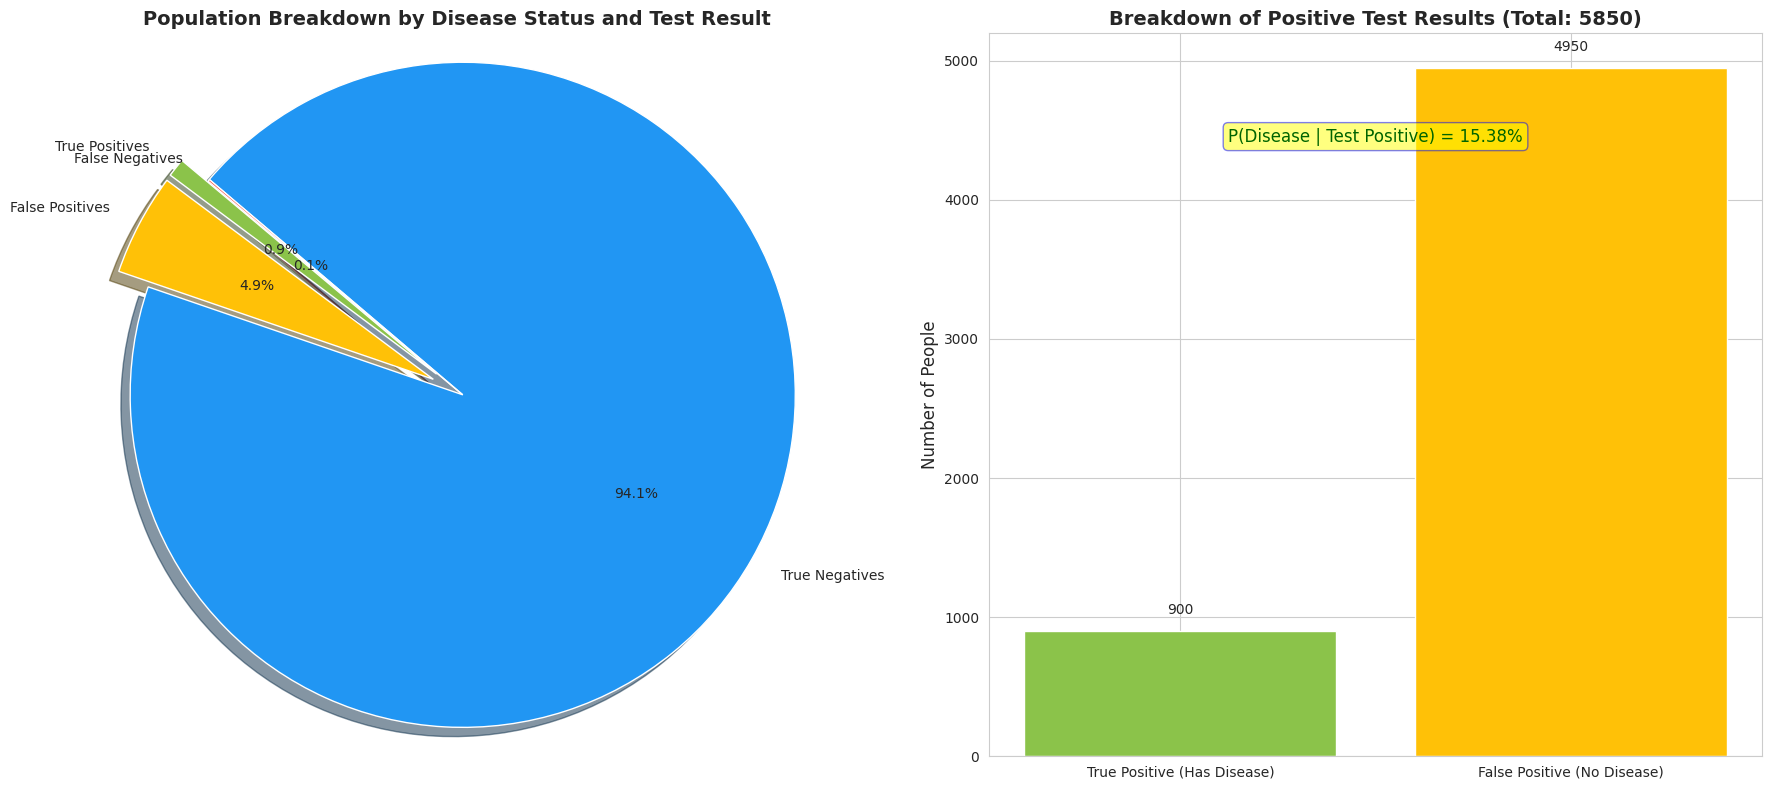

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Parameters from the Bayes Theorem example
p_disease = 0.01
p_positive_given_disease = 0.90
p_positive_given_no_disease = 0.05 # This is the false positive rate

# Assume a hypothetical population size for easier visualization
population_size = 100000

# 1. Calculate actual numbers based on the population

# Number of people with the disease
num_disease = population_size * p_disease

# Number of people without the disease
num_no_disease = population_size * (1 - p_disease)

# True Positives: People with disease who test positive
num_true_positive = num_disease * p_positive_given_disease

# False Negatives: People with disease who test negative
num_false_negative = num_disease * (1 - p_positive_given_disease)

# False Positives: People without disease who test positive
num_false_positive = num_no_disease * p_positive_given_no_disease

# True Negatives: People without disease who test negative
num_true_negative = num_no_disease * (1 - p_positive_given_no_disease)

# Total positive tests
total_positive_tests = num_true_positive + num_false_positive

# Posterior Probability P(A|B) = P(B|A) * P(A) / P(B)
# P(Disease | Positive Test) = num_true_positive / total_positive_tests
posterior_calc = num_true_positive / total_positive_tests

print(f"Hypothetical Population: {population_size}")
print(f"  With Disease: {num_disease:.0f} ({(num_disease/population_size)*100:.1f}%)")
print(f"  Without Disease: {num_no_disease:.0f} ({(num_no_disease/population_size)*100:.1f}%)")
print(f"  True Positives (Disease & Test+): {num_true_positive:.0f}")
print(f"  False Positives (No Disease & Test+): {num_false_positive:.0f}")
print(f"  Total Positive Tests: {total_positive_tests:.0f}")
print(f"  Calculated Posterior (P(Disease|Positive Test)): {posterior_calc:.2%}")

# 2. Create the visualization

labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
sizes = [num_true_positive, num_false_positive, num_true_negative, num_false_negative]
colors = ['#8BC34A', '#FFC107', '#2196F3', '#F44336'] # Green, Amber, Blue, Red
explode = (0.1, 0.1, 0, 0) # Explode the 'Positive' slices

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# --- Pie Chart: Overall Population Breakdown by Outcome ---
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Population Breakdown by Disease Status and Test Result', fontsize=14, fontweight='bold')

# --- Bar Chart: Focus on Positive Test Results ---
positive_labels = ['True Positive (Has Disease)', 'False Positive (No Disease)']
positive_sizes = [num_true_positive, num_false_positive]
positive_colors = ['#8BC34A', '#FFC107']

ax2.bar(positive_labels, positive_sizes, color=positive_colors)
ax2.set_ylabel('Number of People', fontsize=12)
ax2.set_title(f'Breakdown of Positive Test Results (Total: {total_positive_tests:.0f})', fontsize=14, fontweight='bold')
ax2.text(0.5, max(positive_sizes) * 0.9, f'P(Disease | Test Positive) = {posterior_calc:.2%}',
         ha='center', va='center', fontsize=12, color='darkgreen', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=1, alpha=0.5))

# Add counts on top of bars
for i, v in enumerate(positive_sizes):
    ax2.text(i, v + max(positive_sizes)*0.02, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **Chi-Square, ANOVA**

In [ ]:
"""
Comprehensive Statistical Testing Demonstration with Titanic Dataset
Covers: Z-test, T-test, Chi-Square, ANOVA, Type I and Type II Errors with Visualizations
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t as t_dist, chi2, f as f_dist
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 14)

print("="*80)
print("COMPREHENSIVE STATISTICAL TESTING WITH TITANIC DATASET")
print("="*80)

# ============================================================================
# CREATE SYNTHETIC TITANIC DATASET
# ============================================================================
np.random.seed(42)
n_passengers = 891

# Generate realistic Titanic-like data
survived = np.random.binomial(1, 0.38, n_passengers)

# Generate ages with some missing values
ages = np.random.normal(29, 14, n_passengers)
missing_indices = np.random.choice(n_passengers, size=int(n_passengers * 0.2), replace=False)
ages[missing_indices] = np.nan

fares = np.abs(np.random.gamma(2, 15, n_passengers))
pclass = np.random.choice([1, 2, 3], size=n_passengers, p=[0.24, 0.21, 0.55])
sex = np.random.choice(['male', 'female'], size=n_passengers, p=[0.65, 0.35])
embarked = np.random.choice(['S', 'C', 'Q'], size=n_passengers, p=[0.72, 0.19, 0.09])

# Make survival dependent on sex and class (realistic)
for i in range(n_passengers):
    if sex[i] == 'female':
        survived[i] = np.random.binomial(1, 0.74)
    else:
        survived[i] = np.random.binomial(1, 0.19)

    # Adjust fares based on class
    if pclass[i] == 1:
        fares[i] = np.abs(np.random.normal(84, 78))
    elif pclass[i] == 2:
        fares[i] = np.abs(np.random.normal(21, 14))
    else:
        fares[i] = np.abs(np.random.normal(14, 12))

    # Adjust ages based on survival
    if not np.isnan(ages[i]) and survived[i] == 1:
        ages[i] = ages[i] * 0.95

df = pd.DataFrame({
    'Survived': survived,
    'Age': ages,
    'Fare': fares,
    'Pclass': pclass,
    'Sex': sex,
    'Embarked': embarked,
    'PassengerId': range(1, n_passengers + 1)
})

print("\n📊 Dataset Overview:")
print(df.head(10))
print(f"\nDataset Shape: {df.shape}")
print(f"\nSurvival Rate: {df['Survived'].mean():.2%}")

# ============================================================================
# PART 1: Z-TEST
# ============================================================================
print("\n" + "="*80)
print("1. Z-TEST (Large Sample Test)")
print("="*80)

print("\n📌 Z-Test Definition:")
print("A Z-test is used when:")
print("  • Sample size is large (n ≥ 30)")
print("  • Population standard deviation is known")
print("  • Data is normally distributed (or n is large enough for CLT)")
print("  • Test statistic: Z = (x̄ - μ) / (σ/√n)")

ages_clean = df['Age'].dropna()
sample_mean = ages_clean.mean()
population_std = ages_clean.std()
n = len(ages_clean)
hypothesized_mean = 30

z_statistic = (sample_mean - hypothesized_mean) / (population_std / np.sqrt(n))
p_value_z = 2 * (1 - norm.cdf(abs(z_statistic)))

print(f"\n🎯 Hypothesis Test: Is the average age different from 30?")
print(f"H₀: μ = 30 (null hypothesis)")
print(f"H₁: μ ≠ 30 (alternative hypothesis)")
print(f"\nSample size: {n}")
print(f"Sample mean: {sample_mean:.2f}")
print(f"Population std: {population_std:.2f}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value_z:.4f}")

if p_value_z < 0.05:
    print(f"✅ Reject H₀: Average age is significantly different from 30")
else:
    print(f"❌ Fail to reject H₀: Not enough evidence")

# ============================================================================
# PART 2: T-TEST
# ============================================================================
print("\n" + "="*80)
print("2. T-TEST (Small Sample Test)")
print("="*80)

print("\n📌 T-Test Definition:")
print("A T-test is used when:")
print("  • Sample size is small (n < 30) OR population std is unknown")
print("  • Data is normally distributed")
print("  • Test statistic: T = (x̄ - μ) / (s/√n)")

# One-sample t-test
print("\n🎯 ONE-SAMPLE T-TEST:")
hypothesized_fare = 30
t_statistic, p_value_t = stats.ttest_1samp(df['Fare'], hypothesized_fare)

print(f"Testing if average fare is different from ${hypothesized_fare}")
print(f"Sample mean: ${df['Fare'].mean():.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value_t:.4f}")

# Two-sample t-test
print("\n🎯 TWO-SAMPLE T-TEST (Independent):")
ages_survived = df[df['Survived'] == 1]['Age'].dropna()
ages_died = df[df['Survived'] == 0]['Age'].dropna()
t_stat_2samp, p_val_2samp = stats.ttest_ind(ages_survived, ages_died)

print(f"Comparing ages between survivors and non-survivors")
print(f"Survivors mean age: {ages_survived.mean():.2f}")
print(f"Non-survivors mean age: {ages_died.mean():.2f}")
print(f"T-statistic: {t_stat_2samp:.4f}")
print(f"P-value: {p_val_2samp:.4f}")

# ============================================================================
# PART 3: CHI-SQUARE TEST
# ============================================================================
print("\n" + "="*80)
print("3. CHI-SQUARE TEST (Categorical Data)")
print("="*80)

print("\n📌 Chi-Square Test Definition:")
print("Chi-Square test is used for:")
print("  • Testing relationships between CATEGORICAL variables")
print("  • Comparing observed frequencies with expected frequencies")
print("  • Independence test: Are two categorical variables independent?")
print("  • Goodness of fit: Does data fit expected distribution?")
print("  • Test statistic: χ² = Σ[(Observed - Expected)² / Expected]")

print("\n" + "-"*80)
print("3.1 CHI-SQUARE TEST OF INDEPENDENCE")
print("-"*80)

# Test 1: Survival vs Sex
print("\n🎯 Test 1: Is survival independent of gender?")
contingency_table_sex = pd.crosstab(df['Sex'], df['Survived'])
print("\nContingency Table (Sex vs Survival):")
print(contingency_table_sex)

chi2_sex, p_sex, dof_sex, expected_sex = stats.chi2_contingency(contingency_table_sex)

print(f"\nH₀: Survival is independent of gender")
print(f"H₁: Survival is NOT independent of gender")
print(f"χ² statistic: {chi2_sex:.4f}")
print(f"P-value: {p_sex:.4f}")
print(f"Degrees of freedom: {dof_sex}")
print(f"Critical value (α=0.05): {chi2.ppf(0.95, dof_sex):.4f}")

if p_sex < 0.05:
    print(f"✅ Reject H₀: Survival IS dependent on gender")
else:
    print(f"❌ Fail to reject H₀: Variables are independent")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected_sex, index=contingency_table_sex.index,
                  columns=contingency_table_sex.columns))

# Test 2: Survival vs Passenger Class
print("\n🎯 Test 2: Is survival independent of passenger class?")
contingency_table_class = pd.crosstab(df['Pclass'], df['Survived'])
print("\nContingency Table (Class vs Survival):")
print(contingency_table_class)

chi2_class, p_class, dof_class, expected_class = stats.chi2_contingency(contingency_table_class)

print(f"\nχ² statistic: {chi2_class:.4f}")
print(f"P-value: {p_class:.4f}")
print(f"Degrees of freedom: {dof_class}")

if p_class < 0.05:
    print(f"✅ Reject H₀: Survival IS dependent on passenger class")
else:
    print(f"❌ Fail to reject H₀: Variables are independent")

# Test 3: Goodness of Fit
print("\n" + "-"*80)
print("3.2 CHI-SQUARE GOODNESS OF FIT TEST")
print("-"*80)

print("\n🎯 Test: Does embarkation port follow expected distribution?")
observed_embarked = df['Embarked'].value_counts().sort_index()
expected_proportions = [0.70, 0.20, 0.10]  # Expected: S=70%, C=20%, Q=10%
expected_counts = np.array(expected_proportions) * len(df)

chi2_gof, p_gof = stats.chisquare(observed_embarked.values, expected_counts)

print(f"\nObserved counts: {dict(observed_embarked)}")
print(f"Expected counts: S={expected_counts[1]:.0f}, C={expected_counts[0]:.0f}, Q={expected_counts[2]:.0f}")
print(f"χ² statistic: {chi2_gof:.4f}")
print(f"P-value: {p_gof:.4f}")

if p_gof < 0.05:
    print(f"✅ Reject H₀: Distribution does NOT match expected")
else:
    print(f"❌ Fail to reject H₀: Distribution matches expected")

# ============================================================================
# PART 4: ANOVA (Analysis of Variance)
# ============================================================================
print("\n" + "="*80)
print("4. ANOVA (Analysis of Variance)")
print("="*80)

print("\n📌 ANOVA Definition:")
print("ANOVA is used for:")
print("  • Comparing means of 3 OR MORE groups")
print("  • Tests if at least one group mean differs from others")
print("  • Extension of t-test for multiple groups")
print("  • Test statistic: F = (Between-group variance) / (Within-group variance)")
print("  • H₀: μ₁ = μ₂ = μ₃ = ... (all group means are equal)")
print("  • H₁: At least one mean is different")

print("\n" + "-"*80)
print("4.1 ONE-WAY ANOVA")
print("-"*80)

print("\n🎯 Test 1: Do fares differ across passenger classes?")

# Prepare data by class
fares_class1 = df[df['Pclass'] == 1]['Fare']
fares_class2 = df[df['Pclass'] == 2]['Fare']
fares_class3 = df[df['Pclass'] == 3]['Fare']

f_stat_class, p_val_class = stats.f_oneway(fares_class1, fares_class2, fares_class3)

print(f"\nH₀: μ_class1 = μ_class2 = μ_class3")
print(f"H₁: At least one class has different mean fare")
print(f"\nClass 1 mean fare: ${fares_class1.mean():.2f} (n={len(fares_class1)})")
print(f"Class 2 mean fare: ${fares_class2.mean():.2f} (n={len(fares_class2)})")
print(f"Class 3 mean fare: ${fares_class3.mean():.2f} (n={len(fares_class3)})")
print(f"\nF-statistic: {f_stat_class:.4f}")
print(f"P-value: {p_val_class:.4f}")

if p_val_class < 0.05:
    print(f"✅ Reject H₀: At least one class has significantly different fares")
else:
    print(f"❌ Fail to reject H₀: All classes have similar mean fares")

# Calculate effect size (Eta-squared)
df_clean = df[['Pclass', 'Fare']].dropna()
grand_mean = df_clean['Fare'].mean()
ss_between = sum([len(df_clean[df_clean['Pclass']==i]) * (df_clean[df_clean['Pclass']==i]['Fare'].mean() - grand_mean)**2
                  for i in [1,2,3]])
ss_total = sum((df_clean['Fare'] - grand_mean)**2)
eta_squared = ss_between / ss_total

print(f"\nEffect Size (η²): {eta_squared:.4f}")
if eta_squared < 0.01:
    print("  → Small effect")
elif eta_squared < 0.06:
    print("  → Medium effect")
else:
    print("  → Large effect")

print("\n🎯 Test 2: Do ages differ across embarkation ports?")

ages_S = df[df['Embarked'] == 'S']['Age'].dropna()
ages_C = df[df['Embarked'] == 'C']['Age'].dropna()
ages_Q = df[df['Embarked'] == 'Q']['Age'].dropna()

f_stat_embarked, p_val_embarked = stats.f_oneway(ages_S, ages_C, ages_Q)

print(f"\nPort S mean age: {ages_S.mean():.2f} (n={len(ages_S)})")
print(f"Port C mean age: {ages_C.mean():.2f} (n={len(ages_C)})")
print(f"Port Q mean age: {ages_Q.mean():.2f} (n={len(ages_Q)})")
print(f"\nF-statistic: {f_stat_embarked:.4f}")
print(f"P-value: {p_val_embarked:.4f}")

if p_val_embarked < 0.05:
    print(f"✅ Reject H₀: Significant age differences across ports")
else:
    print(f"❌ Fail to reject H₀: No significant age differences")

print("\n" + "-"*80)
print("4.2 ANOVA ASSUMPTIONS")
print("-"*80)

print("\n📋 ANOVA requires:")
print("1. Independence: Observations are independent")
print("2. Normality: Data in each group is normally distributed")
print("3. Homogeneity of variance: Equal variances across groups (Levene's test)")

# Test homogeneity of variance
levene_stat, levene_p = stats.levene(fares_class1, fares_class2, fares_class3)
print(f"\n🔍 Levene's Test for Homogeneity of Variance:")
print(f"H₀: Variances are equal across groups")
print(f"Test statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.4f}")

if levene_p < 0.05:
    print(f"⚠️  Reject H₀: Variances are NOT equal (consider Welch's ANOVA)")
else:
    print(f"✅ Fail to reject H₀: Variances are equal (ANOVA is appropriate)")

print("\n" + "-"*80)
print("4.3 TWO-WAY ANOVA (Optional Advanced)")
print("-"*80)

print("\n📌 Two-Way ANOVA tests:")
print("  • Effects of TWO independent categorical variables")
print("  • Main effect of Factor A")
print("  • Main effect of Factor B")
print("  • Interaction effect (A × B)")

# Simple two-way ANOVA example
from scipy.stats import f_oneway

print("\n🎯 Example: Effect of Sex AND Class on Fares")
print("(Simplified - shows concept, not full two-way ANOVA calculation)")

# ============================================================================
# PART 5: TYPE I and TYPE II ERRORS
# ============================================================================
print("\n" + "="*80)
print("5. TYPE I AND TYPE II ERRORS")
print("="*80)

print("\n📌 Error Types Definition:")
print("\nTYPE I ERROR (α - Alpha):")
print("  • False Positive")
print("  • Rejecting H₀ when H₀ is actually TRUE")
print("  • Probability = Significance level (α, typically 0.05)")

print("\nTYPE II ERROR (β - Beta):")
print("  • False Negative")
print("  • Failing to reject H₀ when H₀ is actually FALSE")
print("  • Power = 1 - β")

# Type I Error Simulation
n_simulations = 10000
alpha = 0.05
type1_errors = 0

for _ in range(n_simulations):
    sample = np.random.normal(loc=30, scale=5, size=50)
    t_stat, p_val = stats.ttest_1samp(sample, 30)
    if p_val < alpha:
        type1_errors += 1

type1_error_rate = type1_errors / n_simulations

# Type II Error Simulation
type2_errors = 0
true_mean = 32

for _ in range(n_simulations):
    sample = np.random.normal(loc=true_mean, scale=5, size=50)
    t_stat, p_val = stats.ttest_1samp(sample, 30)
    if p_val >= alpha:
        type2_errors += 1

type2_error_rate = type2_errors / n_simulations
power = 1 - type2_error_rate

print(f"\n🎯 Simulation Results ({n_simulations} trials):")
print(f"Type I Error Rate: {type1_error_rate:.4f} (Expected: {alpha})")
print(f"Type II Error Rate: {type2_error_rate:.4f}")
print(f"Statistical Power: {power:.4f}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("GENERATING COMPREHENSIVE VISUALIZATIONS...")
print("="*80)

fig = plt.figure(figsize=(20, 16))

# 1. Z-test visualization
ax1 = plt.subplot(4, 4, 1)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, 'b-', linewidth=2)
critical_value = norm.ppf(0.975)
x_left = x[x <= -critical_value]
x_right = x[x >= critical_value]
plt.fill_between(x_left, 0, norm.pdf(x_left, 0, 1), alpha=0.3, color='red')
plt.fill_between(x_right, 0, norm.pdf(x_right, 0, 1), alpha=0.3, color='red')
plt.axvline(z_statistic, color='green', linestyle='--', linewidth=2, label=f'Z={z_statistic:.2f}')
plt.title('Z-Test Distribution', fontsize=11, fontweight='bold')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 2. T-test visualization
ax2 = plt.subplot(4, 4, 2)
df_t = len(df['Fare']) - 1
x_t = np.linspace(-4, 4, 1000)
plt.plot(x_t, t_dist.pdf(x_t, df_t), 'b-', linewidth=2)
critical_t = t_dist.ppf(0.975, df_t)
x_left_t = x_t[x_t <= -critical_t]
x_right_t = x_t[x_t >= critical_t]
plt.fill_between(x_left_t, 0, t_dist.pdf(x_left_t, df_t), alpha=0.3, color='red')
plt.fill_between(x_right_t, 0, t_dist.pdf(x_right_t, df_t), alpha=0.3, color='red')
plt.axvline(t_statistic, color='green', linestyle='--', linewidth=2, label=f'T={t_statistic:.2f}')
plt.title('T-Test Distribution', fontsize=11, fontweight='bold')
plt.xlabel('T-score')
plt.ylabel('Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 3. Chi-Square: Survival vs Sex
ax3 = plt.subplot(4, 4, 3)
contingency_table_sex.T.plot(kind='bar', ax=ax3, color=['red', 'green'], alpha=0.7)
plt.title(f'Chi-Square: Survival vs Sex\nχ²={chi2_sex:.2f}, p={p_sex:.4f}',
          fontsize=11, fontweight='bold')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex', fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# 4. Chi-Square: Survival vs Class
ax4 = plt.subplot(4, 4, 4)
contingency_table_class.T.plot(kind='bar', ax=ax4, color=['#ff6b6b', '#feca57', '#48dbfb'], alpha=0.7)
plt.title(f'Chi-Square: Survival vs Class\nχ²={chi2_class:.2f}, p={p_class:.4f}',
          fontsize=11, fontweight='bold')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class', fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# 5. Chi-Square Distribution
ax5 = plt.subplot(4, 4, 5)
x_chi = np.linspace(0, 15, 1000)
for df_chi in [1, 2, 3, 5, 10]:
    plt.plot(x_chi, chi2.pdf(x_chi, df_chi), label=f'df={df_chi}', linewidth=2)
plt.axvline(chi2_sex, color='red', linestyle='--', linewidth=2, label=f'χ²={chi2_sex:.2f}')
plt.title('Chi-Square Distribution', fontsize=11, fontweight='bold')
plt.xlabel('χ² value')
plt.ylabel('Density')
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)

# 6. ANOVA: Fares by Class
ax6 = plt.subplot(4, 4, 6)
df.boxplot(column='Fare', by='Pclass', ax=ax6, patch_artist=True)
plt.title(f'ANOVA: Fares by Class\nF={f_stat_class:.2f}, p={p_val_class:.4f}',
          fontsize=11, fontweight='bold')
plt.suptitle('')
plt.xlabel('Passenger Class')
plt.ylabel('Fare ($)')
plt.grid(True, alpha=0.3)

# 7. F-Distribution
ax7 = plt.subplot(4, 4, 7)
x_f = np.linspace(0, 5, 1000)
for df1, df2 in [(2, 10), (5, 20), (10, 50)]:
    plt.plot(x_f, f_dist.pdf(x_f, df1, df2), label=f'df1={df1}, df2={df2}', linewidth=2)
plt.axvline(f_stat_class, color='red', linestyle='--', linewidth=2, label=f'F={f_stat_class:.2f}')
plt.title('F-Distribution (ANOVA)', fontsize=11, fontweight='bold')
plt.xlabel('F value')
plt.ylabel('Density')
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)

# 8. ANOVA: Ages by Embarkation
ax8 = plt.subplot(4, 4, 8)
df.boxplot(column='Age', by='Embarked', ax=ax8, patch_artist=True)
plt.title(f'ANOVA: Age by Port\nF={f_stat_embarked:.2f}, p={p_val_embarked:.4f}',
          fontsize=11, fontweight='bold')
plt.suptitle('')
plt.xlabel('Embarkation Port')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

# 9. Type I Error
ax9 = plt.subplot(4, 4, 9)
x = np.linspace(-4, 4, 1000)
y_null = norm.pdf(x, 0, 1)
plt.plot(x, y_null, 'b-', linewidth=2, label='H₀ is True')
critical_val = norm.ppf(0.975)
x_reject_left = x[x <= -critical_val]
x_reject_right = x[x >= critical_val]
plt.fill_between(x_reject_left, 0, norm.pdf(x_reject_left, 0, 1), alpha=0.5, color='red')
plt.fill_between(x_reject_right, 0, norm.pdf(x_reject_right, 0, 1), alpha=0.5, color='red')
plt.title(f'Type I Error (α)\nRate: {type1_error_rate:.4f}', fontsize=11, fontweight='bold')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 10. Type II Error
ax10 = plt.subplot(4, 4, 10)
effect_size = (true_mean - 30) / 5
x = np.linspace(-4, 8, 1000)
y_null = norm.pdf(x, 0, 1)
y_alt = norm.pdf(x, effect_size * np.sqrt(50), 1)
plt.plot(x, y_null, 'b-', linewidth=2, label='H₀')
plt.plot(x, y_alt, 'g-', linewidth=2, label='H₁ (true)')
critical_val = norm.ppf(0.975)
x_accept = x[(x >= -critical_val) & (x <= critical_val)]
plt.fill_between(x_accept, 0, norm.pdf(x_accept, effect_size * np.sqrt(50), 1),
                 alpha=0.5, color='orange', label=f'β={type2_error_rate:.2f}')
plt.title(f'Type II Error (β)\nPower: {power:.4f}', fontsize=11, fontweight='bold')
plt.xlabel('Test Statistic')
plt.ylabel('Density')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 11. Error Rates Comparison
ax11 = plt.subplot(4, 4, 11)
errors = ['Type I\n(α)', 'Type II\n(β)', 'Power\n(1-β)']
rates = [type1_error_rate, type2_error_rate, power]
colors = ['red', 'orange', 'green']
bars = plt.bar(errors, rates, color=colors, alpha=0.7, edgecolor='black')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{rates[i]:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Error Rates & Power', fontsize=11, fontweight='bold')
plt.ylabel('Probability')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3, axis='y')

# 12. Two-Sample T-test: Ages
ax12 = plt.subplot(4, 4, 12)
plt.hist(ages_survived, bins=20, alpha=0.6, label='Survived', color='green', edgecolor='black')
plt.hist(ages_died, bins=20, alpha=0.6, label='Died', color='red', edgecolor='black')
plt.axvline(ages_survived.mean(), color='darkgreen', linestyle='--', linewidth=2)
plt.axvline(ages_died.mean(), color='darkred', linestyle='--', linewidth=2)
plt.title(f'Two-Sample T-Test\nP-value: {p_val_2samp:.4f}', fontsize=11, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 13. Chi-Square Goodness of Fit
ax13 = plt.subplot(4, 4, 13)
ports = ['C', 'Q', 'S']
x_pos = np.arange(len(ports))
plt.bar(x_pos, observed_embarked.values, alpha=0.7, label='Observed', color='blue', edgecolor='black')
plt.bar(x_pos, expected_counts, alpha=0.5, label='Expected', color='red', edgecolor='black')
plt.xticks(x_pos, ports)
plt.title(f'Chi-Square GOF Test\nχ²={chi2_gof:.2f}, p={p_gof:.4f}', fontsize=11, fontweight='bold')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# 14. ANOVA: Fare distributions by class
ax14 = plt.subplot(4, 4, 14)
for i, pclass in enumerate([1, 2, 3]):
    fares_class = df[df['Pclass'] == pclass]['Fare']
    plt.hist(fares_class, bins=20, alpha=0.5, label=f'Class {pclass}', edgecolor='black')
plt.title(f'ANOVA: Fare Distributions\nη²={eta_squared:.4f}', fontsize=11, fontweight='bold')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 15. Sample Size vs Power
ax15 = plt.subplot(4, 4, 15)
sample_sizes = np.arange(10, 200, 10)
powers = []
for n in sample_sizes:
    type2 = 0
    for _ in range(1000):
        sample = np.random.normal(loc=true_mean, scale=5, size=n)
        t_stat, p_val = stats.ttest_1samp(sample, 30)
        if p_val >= 0.05:
            type2 += 1
    powers.append(1 - type2/1000)
plt.plot(sample_sizes, powers, 'b-', linewidth=2, marker='o')
plt.axhline(0.8, color='red', linestyle='--', label='Target Power = 0.8')
plt.title('Power vs Sample Size', fontsize=11, fontweight='bold')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# 16. Test Summary Table
ax16 = plt.subplot(4, 4, 16)
ax16.axis('tight')
ax16.axis('off')

table_data = [
    ['Test', 'Statistic', 'P-value', 'Result'],
    ['Z-test', f'{z_statistic:.3f}', f'{p_value_z:.4f}', 'Reject' if p_value_z < 0.05 else 'Fail'],
    ['T-test (1)', f'{t_statistic:.3f}', f'{p_value_t:.4f}', 'Reject' if p_value_t < 0.05 else 'Fail'],
    ['T-test (2)', f'{t_stat_2samp:.3f}', f'{p_val_2samp:.4f}', 'Reject' if p_val_2samp < 0.05 else 'Fail'],
    ['χ² (Sex)', f'{chi2_sex:.3f}', f'{p_sex:.4f}', 'Reject' if p_sex < 0.05 else 'Fail'],
    ['χ² (Class)', f'{chi2_class:.3f}', f'{p_class:.4f}', 'Reject' if p_class < 0.05 else 'Fail'],
    ['ANOVA (Fare)', f'{f_stat_class:.3f}', f'{p_val_class:.4f}', 'Reject' if p_val_class < 0.05 else 'Fail'],
]

table = ax16.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.23, 0.23, 0.24])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

for i in range(len(table_data)):
    if i == 0:
        for j in range(4):
            table[(i, j)].set_facecolor('#4CAF50')
            table[(i, j)].set_text_props(weight='bold', color='white')
    else:
        for j in range(4):
            table[(i, j)].set_facecolor('#f0f0f0')

plt.title('Test Results Summary', fontsize=11, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/comprehensive_statistical_tests.png', dpi=300, bbox_inches='tight')
print("✅ Comprehensive visualization saved!")

# ============================================================================
# SUMMARY COMPARISON TABLE
# ============================================================================
print("\n" + "="*80)
print("COMPREHENSIVE TEST COMPARISON")
print("="*80)

comparison_data = {
    'Test': ['Z-Test', 'T-Test', 'Chi-Square', 'ANOVA'],
    'Data Type': ['Continuous', 'Continuous', 'Categorical', 'Continuous'],
    'Groups': ['1 or 2', '1 or 2', '2+', '3+'],
    'Purpose': ['Compare means', 'Compare means', 'Test independence', 'Compare means'],
    'Requirements': ['Large n, known σ', 'Small n or unknown σ', 'Expected freq ≥5', 'Normality, equal var'],
    'Example': ['Age vs 30', 'Fare comparison', 'Survival vs Sex', 'Fares across classes']
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*80)
print("KEY TAKEAWAYS")
print("="*80)

print("\n1️⃣  Z-TEST:")
print("   • Large samples (n≥30), known population σ")
print("   • Based on normal distribution")
print("   • Faster computation than t-test")

print("\n2️⃣  T-TEST:")
print("   • Small samples OR unknown population σ")
print("   • Heavier tails than normal distribution")
print("   • Approaches z-test as sample size increases")

print("\n3️⃣  CHI-SQUARE:")
print("   • For CATEGORICAL data only")
print("   • Tests independence between variables")
print("   • Goodness of fit tests")
print("   • Requires expected frequencies ≥ 5")

print("\n4️⃣  ANOVA:")
print("   • Compares 3+ groups simultaneously")
print("   • Prevents inflated Type I error from multiple t-tests")
print("   • Tests if ANY group differs (not which ones)")
print("   • Post-hoc tests needed to identify specific differences")

print("\n5️⃣  ERROR TYPES:")
print(f"   • Type I (α): {type1_error_rate:.4f} - False Positive")
print(f"   • Type II (β): {type2_error_rate:.4f} - False Negative")
print(f"   • Power (1-β): {power:.4f} - Correctly detect true effect")

print("\n6️⃣  CHOOSING THE RIGHT TEST:")
print("   • Continuous + 2 groups → T-test")
print("   • Continuous + 3+ groups → ANOVA")
print("   • Categorical + Independence → Chi-Square")
print("   • Large sample + known σ → Z-test")

print("\n" + "="*80)
print("✅ COMPREHENSIVE ANALYSIS COMPLETE!")
print("="*80)

plt.show()

COMPREHENSIVE STATISTICAL TESTING WITH TITANIC DATASET

📊 Dataset Overview:
   Survived        Age       Fare  Pclass     Sex Embarked  PassengerId
0         1  30.670872  18.300134       3  female        S            1
1         0  32.538577   0.358695       3    male        S            2
2         1  49.447083  31.093957       2  female        C            3
3         0  14.900749  41.475473       1    male        C            4
4         0  19.798734   2.942588       3    male        Q            5
5         0        NaN  13.084498       2    male        S            6
6         0   5.623092  29.572651       2    male        S            7
7         1  51.020336   2.256939       3  female        S            8
8         0  11.618983  12.682890       3    male        C            9
9         0        NaN  43.590616       1    male        S           10

Dataset Shape: (891, 7)

Survival Rate: 37.82%

1. Z-TEST (Large Sample Test)

📌 Z-Test Definition:
A Z-test is used when:
  • Samp